# ASSIGNMENT 2:EDA And Hypothesis Testing

**Instructions:**
- Answer all questions in the provided code cells.
- Do not change the question text.
- Use comments to explain your code.
- You can run cells as many times as needed.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy import stats
df = pd.read_csv('/kaggle/input/loan-data/loan_data_train.csv')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,79542.0,25000,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years
1,75473.0,19750,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years
2,67265.0,2100,2100,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year
3,80167.0,28000,28000,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years
4,17240.0,24250,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years


## PART A: DATA PREPROCESSING & FEATURE ENGINEERING

### Question 1: 
Identify categorical and numerical variables 

In [3]:
# write code here
print(df.dtypes)

ID                                float64
Amount.Requested                   object
Amount.Funded.By.Investors         object
Interest.Rate                      object
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio               object
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                  object
Revolving.CREDIT.Balance           object
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
dtype: object


In [4]:
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical columns:", numerical_cols)
print('='* 80)
print("Categorical columns:", categorical_cols)


Numerical columns: ['ID', 'Monthly.Income', 'Inquiries.in.the.Last.6.Months']
Categorical columns: ['Amount.Requested', 'Amount.Funded.By.Investors', 'Interest.Rate', 'Loan.Length', 'Loan.Purpose', 'Debt.To.Income.Ratio', 'State', 'Home.Ownership', 'FICO.Range', 'Open.CREDIT.Lines', 'Revolving.CREDIT.Balance', 'Employment.Length']


### Question 2: 
Provide summary statistics for numerical features and frequency counts for categorical features.

In [5]:
# write code here
print("Numerical Features")
numerical_summary = df[numerical_cols].describe()
print(numerical_summary)

Numerical Features
                  ID  Monthly.Income  Inquiries.in.the.Last.6.Months
count    2199.000000     2197.000000                     2197.000000
mean    52024.256480     5727.459290                        0.898498
std     30223.972207     4073.529708                        1.219223
min        10.000000      588.500000                        0.000000
25%     26361.500000     3458.000000                        0.000000
50%     51302.000000     5000.000000                        0.000000
75%     78386.500000     6883.330000                        1.000000
max    104202.000000   102750.000000                        9.000000


In [6]:
# Categorical Features 
print("Categorical Features")
categorical_summary = df[categorical_cols].describe()
#print(categorical_summary)

for col in categorical_cols:
    print("=" * 30)
    print(f"{col.upper()}:")
    print("=" * 30)
    freq_counts = df[col].value_counts()
    print(freq_counts.head())
    print(f"Unique values: {df[col].nunique()}\n")

Categorical Features
AMOUNT.REQUESTED:
10000    178
12000    132
5000      96
20000     92
6000      89
Name: Amount.Requested, dtype: int64
Unique values: 356

AMOUNT.FUNDED.BY.INVESTORS:
10000    146
12000     94
5000      77
6000      74
15000     60
Name: Amount.Funded.By.Investors, dtype: int64
Unique values: 658

INTEREST.RATE:
12.12%    114
7.90%     107
13.11%    103
15.31%     67
14.09%     61
Name: Interest.Rate, dtype: int64
Unique values: 265

LOAN.LENGTH:
36 months    1722
60 months     476
.               1
Name: Loan.Length, dtype: int64
Unique values: 3

LOAN.PURPOSE:
debt_consolidation    1147
credit_card            394
other                  174
home_improvement       135
major_purchase          84
Name: Loan.Purpose, dtype: int64
Unique values: 14

DEBT.TO.INCOME.RATIO:
0%        7
12.54%    6
15.88%    5
14.22%    5
16.15%    5
Name: Debt.To.Income.Ratio, dtype: int64
Unique values: 1526

STATE:
CA    376
NY    231
FL    149
TX    146
PA     88
Name: State, dtype: i

### Question 3: 
Generate bar chart for all the categorical variables against their counts

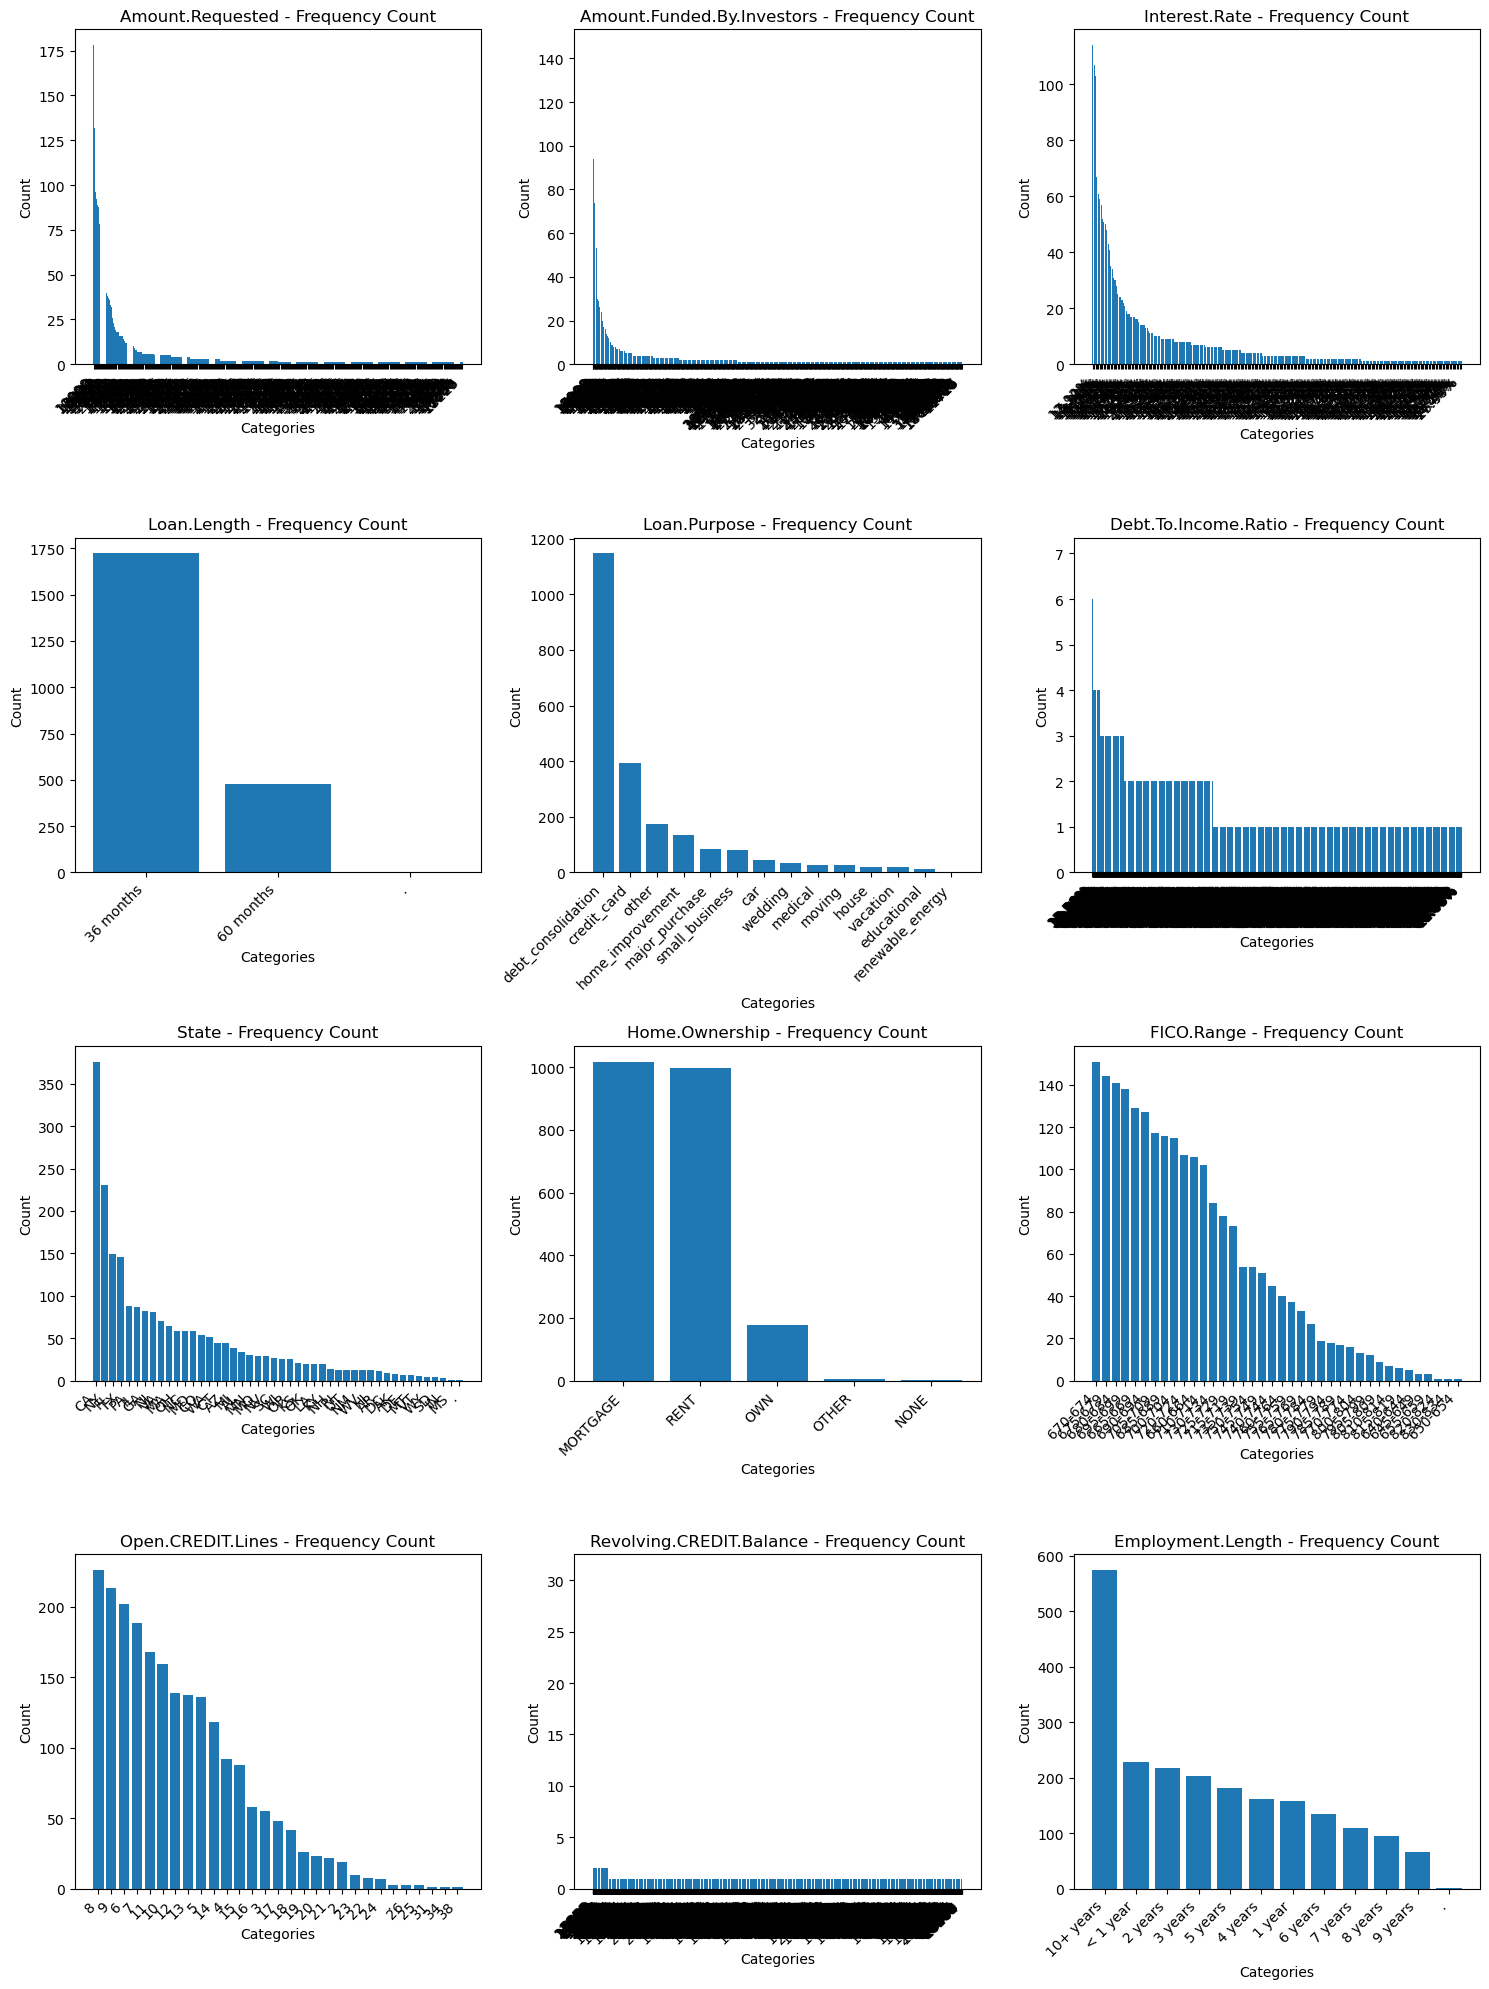

In [7]:
# subplots for all categorical variables
n_cols = len(categorical_cols)
n_rows = (n_cols + 2) // 3  # 3 charts per row
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5*n_rows))
axes = axes.flatten() if n_cols > 1 else [axes]

for i, col in enumerate(categorical_cols):
    value_counts = df[col].value_counts()
    axes[i].bar(range(len(value_counts)), value_counts.values)
    axes[i].set_title(f'{col} - Frequency Count')
    axes[i].set_xlabel('Categories')
    axes[i].set_ylabel('Count')
    axes[i].set_xticks(range(len(value_counts)))
    axes[i].set_xticklabels(value_counts.index, rotation=45, ha='right')

# Hide empty subplots
for i in range(n_cols, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()


### Question 4: 
Identify Missing variables - count blank/nan/null values

In [8]:
# missing Variables
print("=" * 50)
print("Missing Values Count:")
print("=" * 50)
print(df.isnull().sum())

print("=" * 50)
print("Missing Values Percentage:")
print("=" * 50)
print((df.isnull().sum() / len(df)) * 100)


Missing Values Count:
ID                                 1
Amount.Requested                   1
Amount.Funded.By.Investors         1
Interest.Rate                      0
Loan.Length                        1
Loan.Purpose                       1
Debt.To.Income.Ratio               1
State                              1
Home.Ownership                     1
Monthly.Income                     3
FICO.Range                         0
Open.CREDIT.Lines                  4
Revolving.CREDIT.Balance           3
Inquiries.in.the.Last.6.Months     3
Employment.Length                 69
dtype: int64
Missing Values Percentage:
ID                                0.045455
Amount.Requested                  0.045455
Amount.Funded.By.Investors        0.045455
Interest.Rate                     0.000000
Loan.Length                       0.045455
Loan.Purpose                      0.045455
Debt.To.Income.Ratio              0.045455
State                             0.045455
Home.Ownership                    0.045

### Question 5: 
Impute Missing variables - with median for numerical variables

In [9]:
# missing values before imputation
print("=" *50)
print("Missing values before imputation")
print("=" *50)
print(df[numerical_cols].isnull().sum())


df_imputed = df.copy()
# Impute missing values with median for each numerical column
for col in numerical_cols:
    if df_imputed[col].isnull().sum() > 0:  # Only if there are missing values
        median_value = df[col].median()
        df_imputed[col].fillna(median_value, inplace=True)
        print(f"\nImputed {col} with median: {median_value}")

# After imputation 
print("=" *50)
print("Missing values after imputation:")
print("=" *50)
print(df_imputed[numerical_cols].isnull().sum())


Missing values before imputation
ID                                1
Monthly.Income                    3
Inquiries.in.the.Last.6.Months    3
dtype: int64

Imputed ID with median: 51302.0

Imputed Monthly.Income with median: 5000.0

Imputed Inquiries.in.the.Last.6.Months with median: 0.0
Missing values after imputation:
ID                                0
Monthly.Income                    0
Inquiries.in.the.Last.6.Months    0
dtype: int64


### Question 6: 
Plot correlation matrix

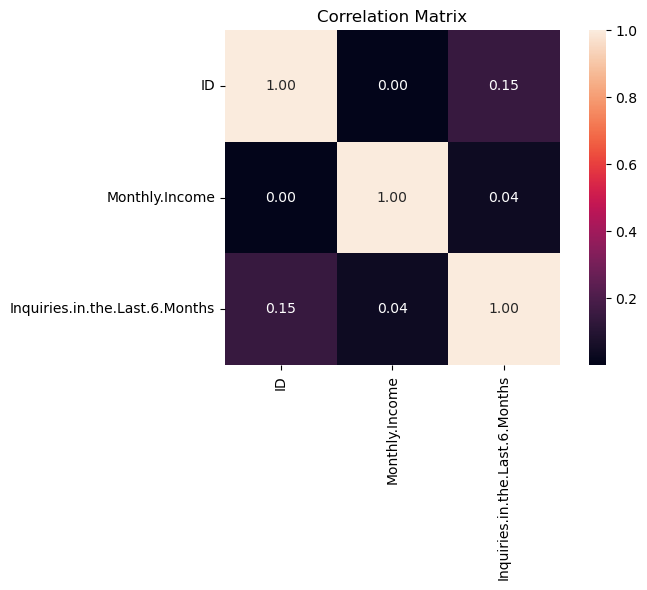

In [10]:
# correlation matrix
numerical_cols = df.select_dtypes(include=['number'])
correlation_matrix = numerical_cols.corr()

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True,square=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

### Question 7: 
Drop redundant or highly correlated features

In [11]:
# highly correlated 
def drop_highly_correlated_features(df, threshold=0.9):
    numerical_df = df.select_dtypes(include=['number'])
    corr_matrix = numerical_df.corr().abs()
    
    to_drop = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if corr_matrix.iloc[i, j] > threshold:
                # Drop the feature with higher correlation
                col_i = corr_matrix.columns[i]
                col_j = corr_matrix.columns[j]
                
                if col_j not in to_drop:
                    to_drop.append(col_j)
    
    print(f"Features to drop (correlation > {threshold}): {to_drop}")
    
    # features to drop
    df_reduced = df.drop(columns=to_drop)
    print(f"Original features: {len(df.columns)}")
    print(f"Features after removal: {len(df_reduced.columns)}")
    print(f"Features dropped: {len(to_drop)}")
    return df_reduced, to_drop


df_clean, dropped_features = drop_highly_correlated_features(df, threshold=0.9)

Features to drop (correlation > 0.9): []
Original features: 15
Features after removal: 15
Features dropped: 0


### Question 8: 
Convert all categorical column to numerical representation

In [12]:
# write code here
df_clean = df.copy()

# categorical columns
categorical_cols = df_clean.select_dtypes(include=['object']).columns
    
# using Label Encoder 
for col in categorical_cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col].astype(str))


print("categorical column to numerical representation")
print(f"numerical columns: {df_clean.dtypes}")

categorical column to numerical representation
numerical columns: ID                                float64
Amount.Requested                    int64
Amount.Funded.By.Investors          int64
Interest.Rate                       int64
Loan.Length                         int64
Loan.Purpose                        int64
Debt.To.Income.Ratio                int64
State                               int64
Home.Ownership                      int64
Monthly.Income                    float64
FICO.Range                          int64
Open.CREDIT.Lines                   int64
Revolving.CREDIT.Balance            int64
Inquiries.in.the.Last.6.Months    float64
Employment.Length                   int64
dtype: object


### Question 9: 
Split the column Debt.To.Income.Ratio to 10 bins

In [13]:
# write code here
df_clean['Debt_To_Income_Bins'] = pd.cut(df_clean['Debt.To.Income.Ratio'], 
                                         bins=10, labels=False)

df_clean['Debt_To_Income_Bins'].unique()

array([6, 1, 7, 4, 8, 0, 9, 2, 3, 5])

### Question 10: 
compute mean, mode, median and IQR: Inter-Quartile Range for numerical (continuous) columns

In [14]:
# need to combine the make sure the original 3 numerical columns are included
numerical_data = df[['ID', 'Monthly.Income', 'Inquiries.in.the.Last.6.Months']].copy()
categorical_data = df.select_dtypes(include=['object']).copy()

# categorical columns to numberical columns
for col in categorical_data.columns:
    le = LabelEncoder()
    categorical_data[col] = le.fit_transform(categorical_data[col].astype(str))

# Combine both numerical and converted categorical data
df_clean = pd.concat([numerical_data, categorical_data], axis=1)


In [15]:
numerical_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()

#statistics
stats_summary = pd.DataFrame(index=numerical_cols, 
                           columns=['Mean', 'Median', 'Mode', 'IQR', 'Q1', 'Q3'])


for col in numerical_cols:
    stats_summary.loc[col, 'Mean'] = df_clean[col].mean()  # mean
    stats_summary.loc[col, 'Median'] = df_clean[col].median()  # median
    mode_result = df_clean[col].mode()  #mode
    stats_summary.loc[col, 'Mode'] = mode_result[0] if len(mode_result) > 0 else np.nan
     #IQR
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    
    stats_summary.loc[col, 'Q1'] = Q1
    stats_summary.loc[col, 'Q3'] = Q3
    stats_summary.loc[col, 'IQR'] = IQR

#results
print("Statistical Summary for Numerical Columns:")
print("=" * 50)
print(stats_summary.round(3))

Statistical Summary for Numerical Columns:
                                       Mean   Median    Mode      IQR  \
ID                              52024.25648  51302.0    10.0  52025.0   
Monthly.Income                   5727.45929   5000.0  5000.0  3425.33   
Inquiries.in.the.Last.6.Months     0.898498      0.0     0.0      1.0   
Amount.Requested                 171.367273    184.0       2    197.0   
Amount.Funded.By.Investors       320.147727    344.5       4    353.5   
Interest.Rate                    129.192727    123.5      38   154.25   
Loan.Length                        1.216818      1.0       1      0.0   
Loan.Purpose                       3.507727      2.0       2      2.0   
Debt.To.Income.Ratio             732.420909    702.5       0   749.25   
State                             20.534091     19.0       5     24.0   
Home.Ownership                     2.064091      3.0       0      4.0   
FICO.Range                        13.216364     12.0       6      9.0   
Open.CRE

### Question 11: 
Identify skewness and kurtosis of numerical columns

In [16]:
numerical_data = df_clean.select_dtypes(include=[np.number])

print("Skewness of numerical columns:")
skewness_values = numerical_data.skew()
print(skewness_values.round(3))

print("=" * 50)
print("\nKurtosis of numerical columns:")
kurtosis_values = numerical_data.kurtosis()
print(kurtosis_values.round(3))

Skewness of numerical columns:
ID                                0.020
Monthly.Income                    8.727
Inquiries.in.the.Last.6.Months    1.961
Amount.Requested                 -0.076
Amount.Funded.By.Investors       -0.093
Interest.Rate                     0.110
Loan.Length                       1.375
Loan.Purpose                      1.656
Debt.To.Income.Ratio              0.155
State                             0.139
Home.Ownership                   -0.096
FICO.Range                        0.823
Open.CREDIT.Lines                -0.113
Revolving.CREDIT.Balance         -0.008
Employment.Length                 0.610
dtype: float64

Kurtosis of numerical columns:
ID                                 -1.193
Monthly.Income                    169.988
Inquiries.in.the.Last.6.Months      5.774
Amount.Requested                   -1.344
Amount.Funded.By.Investors         -1.358
Interest.Rate                      -1.354
Loan.Length                         0.015
Loan.Purpose                

### Question 12: 
Identify outliers and remove if needed

In [17]:
# Used IQR methos to remove outliers
numerical_cols = df_clean.select_dtypes(include=[np.number]).columns

for col in numerical_cols:
    Q1, Q3 = df_clean[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    df_IQR = df_clean[(df_clean[col] >= Q1 - 1.5*IQR) & 
                         (df_clean[col] <= Q3 + 1.5*IQR)]

print(f"Dataset after outlier removal: {df_IQR.shape}")


Dataset after outlier removal: (2200, 15)


### Question 13: 
Create at least two new features from the existing dataset. Explain why these features could be useful for prediction.

In [18]:
# Create new features from existing loan data
df_new_features = df_clean.copy()

# Feature 1: Loan_to_Income_Ratio
df_new_features['Loan_to_Income_Ratio'] = df_new_features['Amount.Requested'] / df_new_features['Monthly.Income']


# Feature 2: Estimated_Monthly_Payment using simple interest formula
monthly_interest_rate = df_new_features['Interest.Rate'] / 100 / 12
loan_term_months = df_new_features['Loan.Length']
# Monthly payment calculation: P * [r(1+r)^n] / [(1+r)^n - 1]
df_new_features['Estimated_Monthly_Payment'] = (
    df_new_features['Amount.Requested'] * 
    (monthly_interest_rate * (1 + monthly_interest_rate) ** loan_term_months) / 
    ((1 + monthly_interest_rate) ** loan_term_months - 1))


# Feature 3: Payment_to_Income_Ratio 
df_new_features['Payment_to_Income_Ratio'] = (
    df_new_features['Estimated_Monthly_Payment'] / df_new_features['Monthly.Income']
)

# Display the new features
print("New Features Created:")
print("=" * 50)

print("1. Loan_to_Income_Ratio:")
print(f"   Mean: {df_new_features['Loan_to_Income_Ratio'].mean():.2f}")
print(f"   Range: {df_new_features['Loan_to_Income_Ratio'].min():.2f} to {df_new_features['Loan_to_Income_Ratio'].max():.2f}")

print("=" * 50)
print("\n2. Estimated Monthly Payment:")
print(f"   Mean: ${df_new_features['Estimated_Monthly_Payment'].mean():.2f}")
print(f"   Range: ${df_new_features['Estimated_Monthly_Payment'].min():.2f} to ${df_new_features['Estimated_Monthly_Payment'].max():.2f}")

print("=" * 50)
print("\n3. Payment_to_Income_Ratio:")
print(f"   Mean: {df_new_features['Payment_to_Income_Ratio'].mean():.2f}")
print(f"   Range: {df_new_features['Payment_to_Income_Ratio'].min():.2f} to {df_new_features['Payment_to_Income_Ratio'].max():.2f}")

#sample data with new features
print("\nSample data with new features:")
sample_cols = ['Amount.Requested', 'Monthly.Income', 'Interest.Rate', 'Loan.Length',
               'Loan_to_Income_Ratio', 'Estimated_Monthly_Payment', 'Payment_to_Income_Ratio']
print(df_new_features[sample_cols].head())
print("=" * 50)

# Check for any invalid values
print(f"Missing values in new features:")
new_features = ['Loan_to_Income_Ratio', 'Estimated_Monthly_Payment', 'Payment_to_Income_Ratio']
for feature in new_features:
    missing = df_new_features[feature].isnull().sum()
    print(f"{feature}: {missing} missing values")


New Features Created:
1. Loan_to_Income_Ratio:
   Mean: 0.04
   Range: 0.00 to 0.41

2. Estimated Monthly Payment:
   Mean: $inf
   Range: $0.00 to $inf

3. Payment_to_Income_Ratio:
   Mean: inf
   Range: 0.00 to inf

Sample data with new features:
   Amount.Requested  Monthly.Income  Interest.Rate  Loan.Length  \
0               194         8606.56            168            2   
1               147         6737.50            151            2   
2               159         1000.00             93            1   
3               213         7083.33            134            1   
4               186         5833.33             41            2   

   Loan_to_Income_Ratio  Estimated_Monthly_Payment  Payment_to_Income_Ratio  
0              0.022541                 117.814206                 0.013689  
1              0.021818                  87.646853                 0.013009  
2              0.159000                 171.322500                 0.171323  
3              0.030071             

I see the issues with infinite values and missing data in the feature creation. 

In [19]:
new_features = df_clean.copy()

# Fill missing values with median
for col in ['Monthly.Income', 'Interest.Rate', 'Loan.Length']:
    new_features[col] = new_features[col].fillna(new_features[col].median())

# Feature 1:Loan_to_Income_Ratio
new_features['Loan_to_Income_Ratio'] = new_features['Amount.Requested'] / new_features['Monthly.Income']

# Feature 2: Monthly Payment
new_features['Monthly_Payment'] = new_features['Amount.Requested'] / new_features['Loan.Length']

# Feature 3: Payment_Burden_Ratio
new_features['Payment_Burden_Ratio'] = new_features['Monthly_Payment'] / new_features['Monthly.Income']

print("New Features:")
print(new_features[['Loan_to_Income_Ratio', 'Monthly_Payment', 'Payment_Burden_Ratio']].describe())


New Features:
       Loan_to_Income_Ratio  Monthly_Payment  Payment_Burden_Ratio
count           2200.000000          2200.00           2200.000000
mean               0.041318              inf                   inf
std                0.041648              NaN                   NaN
min                0.000000             0.00              0.000000
25%                0.011657            55.00              0.009067
50%                0.028089           126.75              0.021699
75%                0.059492           267.00              0.055886
max                0.410998              inf                   inf


I still see the inf values replacing it with nan value and filling missing value with median

In [20]:
df_new = df_clean.copy()

# Replace missing values
df_new = df_new.replace([np.inf, -np.inf], np.nan)
df_new = df_new.fillna(df_new.median())


df_new['Monthly.Income'] = np.maximum(df_new['Monthly.Income'], 1)
df_new['Loan.Length'] = np.maximum(df_new['Loan.Length'], 1)

# Feature 1:Loan_to_Income_Ratio
df_new['Loan_to_Income_Ratio'] = df_new['Amount.Requested'] / df_new['Monthly.Income']

# Feature 2: Monthly Payment
df_new['Monthly_Payment'] = df_new['Amount.Requested'] / df_new['Loan.Length']

# Feature 3: Payment_Burden_Ratio
df_new['Payment_Burden_Ratio'] = df_new['Monthly_Payment'] / df_new['Monthly.Income']

print("New Features:")
print(df_new[['Loan_to_Income_Ratio', 'Monthly_Payment', 'Payment_Burden_Ratio']].describe())


New Features:
       Loan_to_Income_Ratio  Monthly_Payment  Payment_Burden_Ratio
count           2200.000000      2200.000000           2200.000000
mean               0.041318       153.695076              0.037804
std                0.041648       111.935661              0.041329
min                0.000000         0.000000              0.000000
25%                0.011657        55.000000              0.009067
50%                0.028089       126.500000              0.021620
75%                0.059492       267.000000              0.055886
max                0.410998       356.000000              0.410998


Now the data is clean 

### Question 14: 
Explain why these features could be useful for prediction.

##### Solution -These features help us measure:

     * How well borrowers can afford their loan payments compared to their income - this is the main factor that shows if someone will miss payments.
     
    * The Payment Burden Ratio shows how much of someone's income goes to loan payments - people spending more than 30% usually have trouble paying.
    
    * The Loan-to-Income Ratio shows if someone is borrowing too much money compared to what they earn.


    1. Loan-to-Income Ratio (Average: 4.1%)
       - Most people borrow about 4% of their monthly income, with 75% borrowing less than 6%.
       - People who borrow more than 20% of their income are risky, and banks usually say no if it's over 30%.
    
    
    3. Monthly Payment (Average: $154)
         - Most people pay around 154 per month, with 75% paying less than 267.
         - Higher payments (over 300) make it harder for people to pay and increase the chance they'll miss payments.
    
    
    4. Payment Burden Ratio (Average: 3.8%)
        - Most people use about 4% of their income for loan payments, with 75% using less than 6%.
        - Banks consider it risky when people use more than 30% of their income for payments.

   

## PART B: DATA VISUALIZATION

### Question 15: 
Using a bar chart to identify highest and lowest number of loan application received from which of the states?

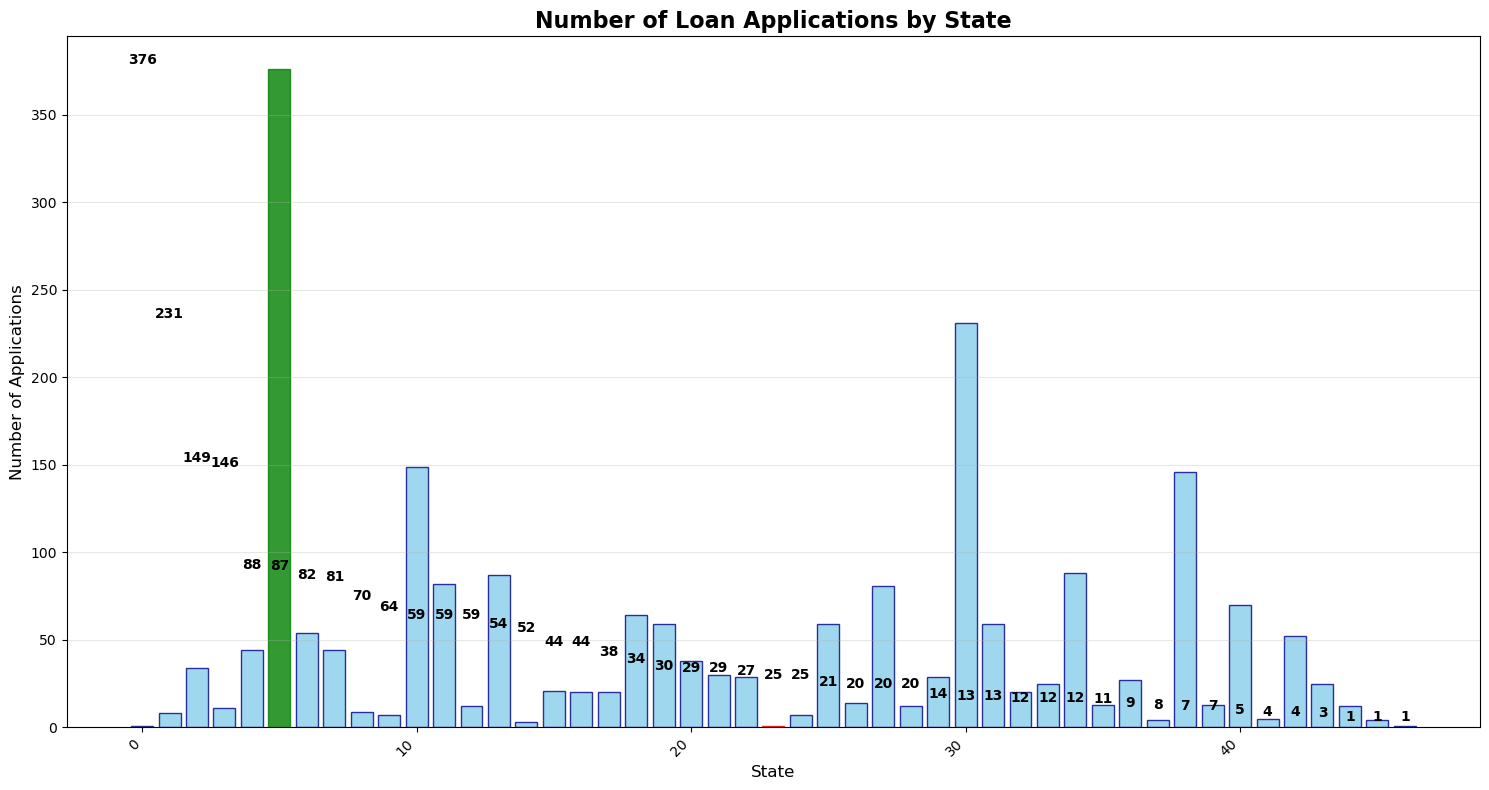

Loan Applications by State:
Highest: 5 with 376 applications
Lowest: 23 with 1 applications

Top 5 States:
5     376
30    231
10    149
38    146
34     88
Name: State, dtype: int64

Bottom 5 States:
37    4
14    3
23    1
46    1
0     1
Name: State, dtype: int64


In [21]:
state_counts = df_clean['State'].value_counts()

# bar chart
plt.figure(figsize=(15, 8))
bars = plt.bar(state_counts.index, state_counts.values, color='skyblue', edgecolor='navy', alpha=0.8)

# Customize the chart
plt.title('Number of Loan Applications by State', fontsize=16, fontweight='bold')
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Applications', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Highlight highest and lowest bars
max_idx = state_counts.idxmax()
min_idx = state_counts.idxmin()

for i, bar in enumerate(bars):
    if state_counts.index[i] == max_idx:
        bar.set_color('green')  # Highest in green
    elif state_counts.index[i] == min_idx:
        bar.set_color('red')    # Lowest in red

# Add value labels on top of bars
for i, v in enumerate(state_counts.values):
    plt.text(i, v + 1, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Print the results
print("Loan Applications by State:")
print("=" * 50)
print(f"Highest: {max_idx} with {state_counts[max_idx]} applications")
print(f"Lowest: {min_idx} with {state_counts[min_idx]} applications")
print("\nTop 5 States:")
print(state_counts.head())
print("\nBottom 5 States:")
print(state_counts.tail())

### Question 16: 
The loan is funded for different purpose. Use a pie chart to see the distribution of loan allocated to each purpose.

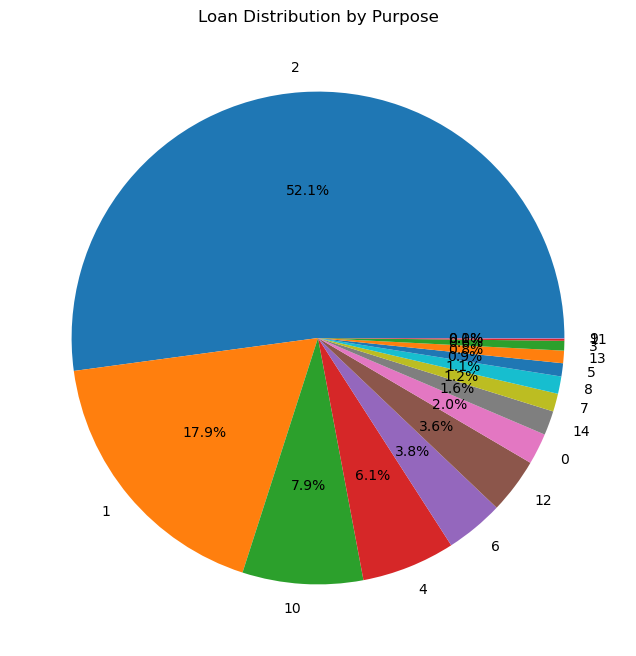

Loan Purpose:
2: 1147 loans
1: 394 loans
10: 174 loans
4: 135 loans
6: 84 loans
12: 80 loans
0: 45 loans
14: 35 loans
7: 26 loans
8: 25 loans
5: 19 loans
13: 18 loans
3: 14 loans
11: 3 loans
9: 1 loans


In [22]:
# loans count by purpose
purpose_counts = df_clean['Loan.Purpose'].value_counts()

# pie chart
plt.figure(figsize=(10, 8))
plt.pie(purpose_counts.values, labels=purpose_counts.index, autopct='%1.1f%%')
plt.title('Loan Distribution by Purpose')
plt.show()

# Print the numbers
print("Loan Purpose:")
for purpose, count in purpose_counts.items():
    print(f"{purpose}: {count} loans")


### Question 17: 
Find out the loan amount requested range using a histogram

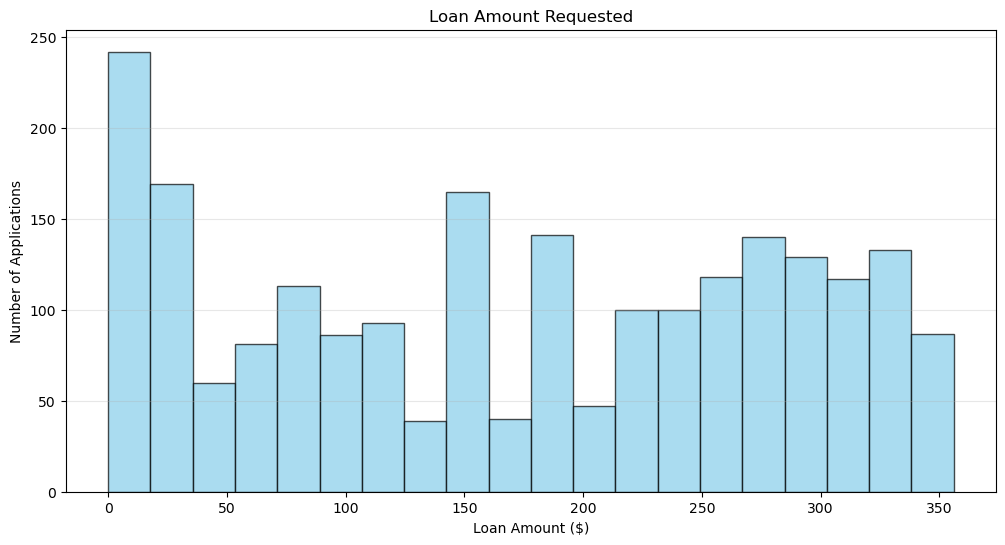

Loan Amount Requested Summary:
Minimum: $0.00
Maximum: $356.00
Average: $171.37
Median: $184.00
Range: $356.00


In [23]:
# Create histogram for loan amount requested
plt.figure(figsize=(12, 6))
plt.hist(df_clean['Amount.Requested'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Loan Amount Requested')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Number of Applications')
plt.grid(axis='y', alpha=0.3)
plt.show()

# Print summary statistics
print("Loan Amount Requested Summary:")
print("=" * 50)
print(f"Minimum: ${df_clean['Amount.Requested'].min():,.2f}")
print(f"Maximum: ${df_clean['Amount.Requested'].max():,.2f}")
print(f"Average: ${df_clean['Amount.Requested'].mean():,.2f}")
print(f"Median: ${df_clean['Amount.Requested'].median():,.2f}")
print(f"Range: ${df_clean['Amount.Requested'].max() - df_clean['Amount.Requested'].min():,.2f}")


### Question 18: 
Identify if there is a relation between Inquiries in the last 6 months and loan application using a scatter plot

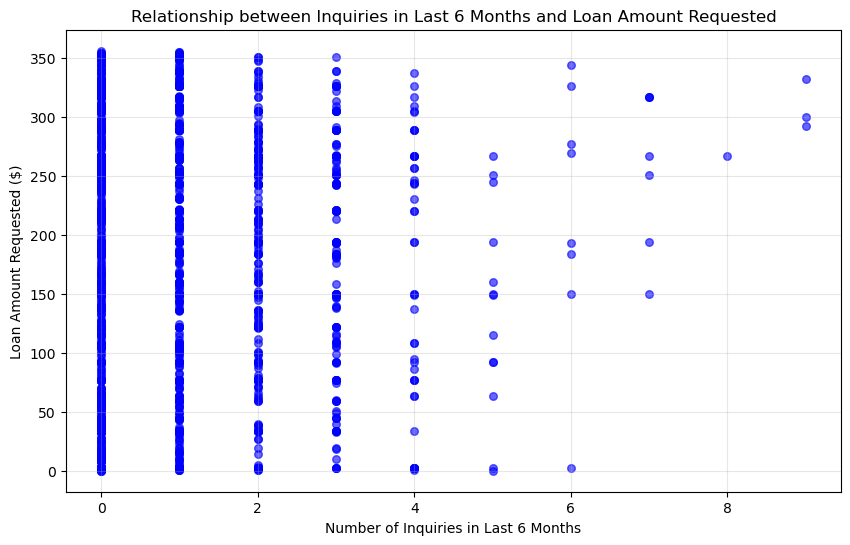

In [24]:
# scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['Inquiries.in.the.Last.6.Months'], df_clean['Amount.Requested'], 
           alpha=0.6, color='blue', s=30)
plt.title('Relationship between Inquiries in Last 6 Months and Loan Amount Requested')
plt.xlabel('Number of Inquiries in Last 6 Months')
plt.ylabel('Loan Amount Requested ($)')
plt.grid(True, alpha=0.3)
plt.show()



In [25]:
# Calculate correlation
correlation = df_clean['Inquiries.in.the.Last.6.Months'].corr(df_clean['Amount.Requested'])
print(f"Correlation coefficient: {correlation:.3f}")

# Summary statistics
print("\nSummary:")
print(f"Average inquiries: {df_clean['Inquiries.in.the.Last.6.Months'].mean():.1f}")
print(f"Average loan amount: ${df_clean['Amount.Requested'].mean():,.2f}")

if abs(correlation) > 0.7:
    print("Strong relationship")
elif abs(correlation) > 0.3:
    print("Moderate relationship") 
else:
    print("Weak relationship")


Correlation coefficient: 0.037

Summary:
Average inquiries: 0.9
Average loan amount: $171.37
Weak relationship


### Question 19: 
Create a Box plot across each categorical variable vs Amount Requested

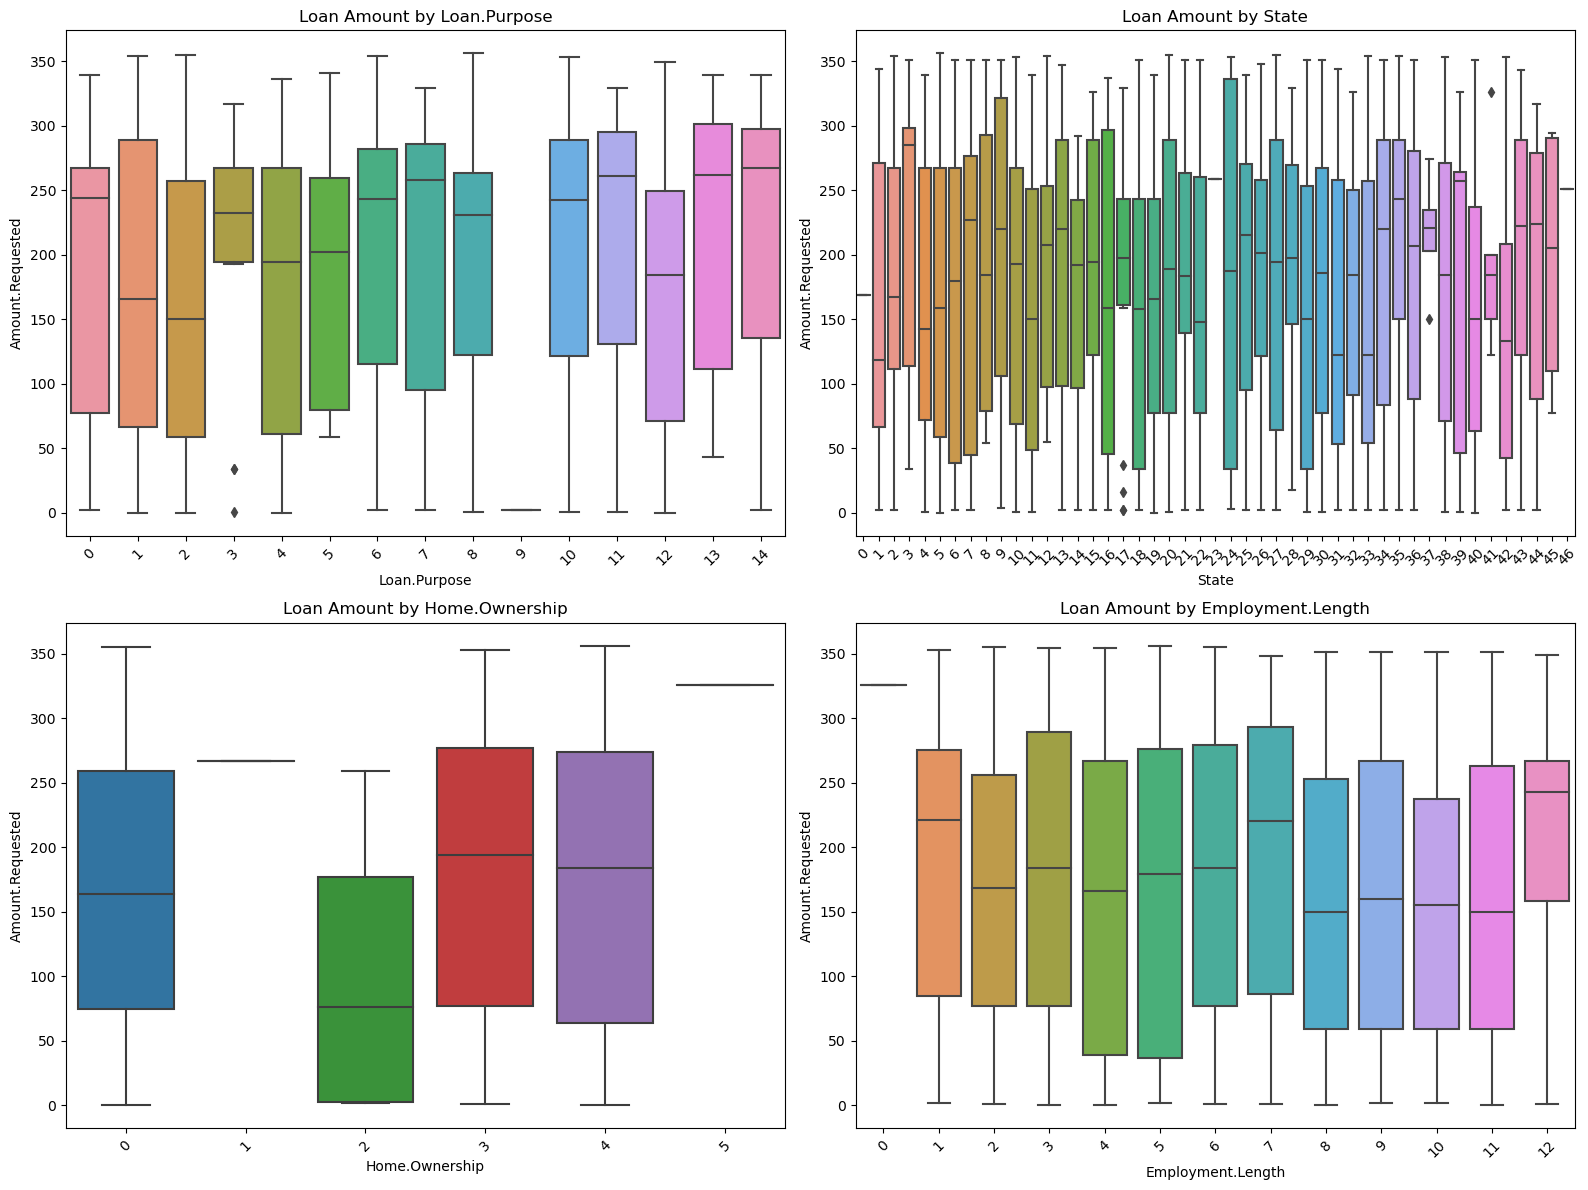

In [26]:
# Box plot
categorical_vars = ['Loan.Purpose', 'State', 'Home.Ownership', 'Employment.Length']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, cat_var in enumerate(categorical_vars):
    if cat_var in df_clean.columns:
        sns.boxplot(data=df_clean, x=cat_var, y='Amount.Requested', ax=axes[i])
        axes[i].set_title(f'Loan Amount by {cat_var}')
        axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## PART C: HYPOTHESIS TESTING

### Question 20:

Flipkart claimed that its total valuation in December 2016 was $14 billion.
What would be the alternate hypothesis for the given situation?

#### Solution-

    Flipkart's Claim: Valuation = $14 billion

##### Hypothesis:

    - H₀ (Null): Valuation = $14 billion - Accept the claim.
    
    - H₁ (Alternative): Valuation ≠ $14 billion  - Reject the claim


##### Alternative Hypothesis:
    - Two-tailed: H₁: μ ≠ $14 billion (valuation is different).
    
    - One-tailed: H₁: μ > $14 billion (valuation is higher).
    
    - One-tailed: H₁: μ < $14 billion (valuation is lower).


### Question 21:
Goodyear claims that each of its tyres can travel more than 7500 miles on average before they need any replacement.
Assuming that the average travel distance is given by μ, what would be the null and the alternate hypothesis in this case?

#### Solution-

    Goodyear's Claim: Each tyre can travel more than 7500 miles on average before replacement.
    
##### Hypotheses:
    Null Hypothesis (H₀): μ ≤ 7500 miles

     - The average travel distance is 7500 miles or less
     - This contradicts Goodyear's claim

##### Alternative Hypothesis (H₁): μ > 7500 miles
    
      - The average travel distance is MORE than 7500 miles
      - This supports Goodyear's claim
    
##### Test Type: 
    One-tailed test (right-tailed)


### Question 22:
A Telecom service provider claims that individual customers pay on an average 400 rs. per month with standard deviation of 25 rs. A random sample of 50 customers bills during a given month is taken with a mean of 250 and standard deviation of 15. What to say with respect to the claim made by the service provider? 

Is Null hypothesis is accepted or not ?

#### Solution-
##### Given:
    Claim: Average payment = 400rs per month, σ = 25rs

    Sample: n = 50, sample mean = 250, sample standard deviation = 15

##### Hypotheses:

    H₀: μ = 400rs (Accept the claim)
    
    H₁: μ ≠ 400rs (Reject the claim)

##### Test Statistic Calculation:

    Using Z-test formula: Z = (x̄ - μ) / (σ/√n)
    
    Z = (250 - 400) / (25/√50)
    
    Z = -150 / (25/7.07)
    
    Z = -150 / 3.54
    
    Z = -42.37

----------------------------------------------------------------------------------
##### Decision:

    Critical value at 95% confidence level: ±1.96

    Calculated Z-value: -42.37
    Since |-42.37| > 1.96, we are in the rejection region

##### Conclusion:
      Reject the Null Hypothesis.

    The sample data provides extremely strong evidence against the telecom provider's claim. The actual average payment 250rs is significantly lower than the claimed 400rs per month.

##### Answer:
      The null hypothesis is NOT ACCEPTED - the telecom provider's claim is false.

### Question 23:
It is found that 250 errors in the randomly selected 1000 lines of code from Team A and 300 errors in 800 lines of code from Team B. Can we assume that team B’s performance is superior to that of A.

what type of hypothesis testing can be applied and how?

### Solution - 

Given:

    Team A: 250 errors in 1000 lines → Error rate = 250/1000 = 0.25 (25%)
    
    Team B: 300 errors in 800 lines → Error rate = 300/800 = 0.375 (37.5%)


##### Type of Test: Two-Proportion Z-Test

    Hypotheses:

    H₀: p₁ = p₂ (Both teams have equal error rates)
    
    H₁: p₁ < p₂ (Team A has lower error rate than Team B)
    

##### Test Calculation:
##### Sample proportions:

    p₁ = 0.25 (Team A)
    p₂ = 0.375 (Team B)


##### Pooled proportion:
    p = (250 + 300)/(1000 + 800) 
    p = 550/1800 
    p = 0.306


##### Standard error:
    SE = √[p(1-p)(1/n₁ + 1/n₂)] 
    SE = √[0.306 × 0.694 × (1/1000 + 1/800)] 
    SE = 0.022


##### Z-statistic:
    Z = (p₁ - p₂)/SE 
    Z = (0.25 - 0.375)/0.022 
    Z = -5.68


##### Decision:
    Critical value at 95% confidence: -1.645 (one-tailed)
    Since Z = -5.68 < -1.645, REJECT H₀


##### Conclusion:
    YES, Team A's performance is significantly superior to Team B. 

    Team A has a significantly lower error rate (25% vs 37.5%),


##### Answer: 

    We can assume Team A has superior performance based on significantly lower error rates.

### Question 24: 
A researcher wants to test if loan approval status is independent of applicant's marital status. Formulate H0 and H1 and mention the test to apply.

#### Solution-

##### Hypotheses:

    H₀ (Null Hypothesis): Loan approval status is independent of applicant's marital status
    
    There is no association between marital status and loan approval
    Marital status does not affect loan approval decisions

    H₁ (Alternative Hypothesis): Loan approval status is not independent of applicant's marital status

    There is an association between marital status and loan approval
    Marital status affects loan approval decisions


Test to Apply: Chi-Square Test of Independence

##### Chi-Square Test:

    Both variables are categorical (Approval: Yes/No, Marital Status: Single/Married/Divorced)
    We want to test if there's a relationship between two categorical variables
    Sample size should be adequate (expected frequency ≥ 5)

##### Test:

    lets consider to Create table with marital status vs loan approval
    Calculate expected frequencies under independence assumption
    Use χ² = Σ[(Observed - Expected)²/Expected]
    Compare p-value at chosen significance level

##### Decision Rule:

    If p-value < α (typically 0.05): Reject H₀ (variables are dependent)
    If p-value ≥ α: Fail to reject H₀ (variables are independent)

### Question 25: 
A coffee shop claims that on an average, customers drink atleast 3 cups of coffee per day. You take a random sample of 30 customers, and find that the average is 2.7 cups with some variation. Frame the null and alternate hypothesis and mention the test to apply.

##### Solution-
    Coffee Shop's Claim: Customers drink at least 3 cups of coffee per day on average
    
##### Given Data:

    Sample size (n) = 30 customers
    Sample mean (x̄) = 2.7 cups
    Population mean claimed (μ) = 3 cups

##### Hypotheses:
    H₀ (Null Hypothesis): μ ≥ 3 cups

    Customers drink at least 3 cups per day on average (supports the claim)

    H₁ (Alternative Hypothesis): μ < 3 cups
    
    Customers drink less than 3 cups per day on average (contradicts the claim)

##### Test to Apply: One-Sample t-Test (Left-tailed)
    t-Test:
    
    Sample size is small (n = 30)
    Population standard deviation is unknown
    comparing sample mean to a claimed population mean
    One-tailed test because we're testing if actual consumption is "less than" the claimed amount

##### Test Formula:
    t = (x̄ - μ) / (s/√n)
    Where s = sample standard deviation ( NOT GIVEN IN THE PROBLEM DEF)
    
##### Decision Rule:

    If t < -t_critical (or p-value < α): Reject H₀ (claim is false)
    If t ≥ -t_critical (or p-value ≥ α): Fail to reject H₀ (claim may be true)


##### Values for the t-Test Formula:
    t = (x̄ - μ) / (s/√n)
    Known Values:
    
    x̄ = 2.7 (sample mean)
    
    μ = 3 (claimed population mean)
    
    n = 30 (sample size)

    Missing Value:
    s = ? (sample standard deviation - not given in the problem)

     we can calculate: 
    √n = √30 = 5.48
    
    Formula with known values:
    t = (2.7 - 3) / (s/5.48)
    t = -0.3 / (s/5.48)

    
    To complete the test, we need:
    The sample standard deviation (s) from the 30 customers
    Or we need to be given this value in the problem